In [46]:
alpha = 5
beta = 4

function f((x1, x2))
    alpha * x1^4 + beta * x2^4
end

function grad_f((x1, x2))
    return (4 * alpha * x1^3, 4 * beta * x2^3)
end

grad_f (generic function with 1 method)

In [47]:
function g((x1k, x2k), a)
    y1k, y2k = grad_f((x1k, x2k))
    f((x1k + a * -y1k, x2k + a * -y2k))
end

function norm((x1, x2))
    sqrt(x1^2 + x2^2)
end

function dichotomy((x1k, x2k), a, b, eps)
    while true
        c = (a + b) / 2
        f0 = g((x1k, x2k), c) - g((x1k, x2k), c + eps)
        if f0 >= 0
            a = c
        else
            b = c
        end
        if b - a <= eps
            return c
        end
    end
end

dichotomy (generic function with 1 method)

In [48]:
function fastest_desc(eps)
    y_r = []
    x_r = []
    xk = (5, 5)
    push!(x_r, xk)
    yk = grad_f(xk)
    k = 0
    while true
        a = dichotomy(xk, 0.00001, 10000, min(1/abs(max(alpha, beta)), 0.001))
        xk = (xk[1] - a * yk[1], xk[2] - a * yk[2])
        push!(y_r, ( - a * yk[1], - a * yk[2]))
        yk = grad_f(xk)
        push!(x_r, xk)
        k = k + 1
        if norm(grad_f(xk)) <= eps
            return x_r, y_r, k
        end
    end
end

fastest_desc (generic function with 1 method)

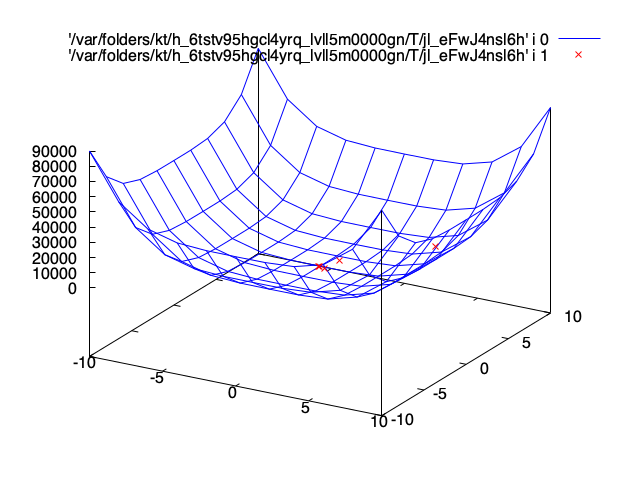

In [49]:
x_r, y_r = fastest_desc(0.01)

using Gaston

X1 = -10:2:10
X2 = -10:2:10
Z = [f((x2, x1)) for x1 in X1, x2 in X2]
surf(X2, X1, Z, lc = :blue, w = :l)

Z_P = [f(x) for x in x_r]
surf!(first.(x_r), last.(x_r), Z_P, lc = :red)



#plot(deleteat!(first.(x_r), length(x_r)), deleteat!(last.(x_r), length(x_r)), supp = [first.(y_r) last.(y_r)], w = :vectors)
